In [2]:
import pandas as pd

In [29]:
reddit_data = pd.read_csv( '/content/drive/My Drive/Topic detection/reddit_final.csv',index_col = 0)

In [ ]:
reddit_data.shape

(154656, 8)

In [30]:
reddit_data.drop(  ['Submission ID','Text','ID','Top Level','Parent ID','Processed Text','BERT Text'] ,axis=1, inplace = True)

In [247]:
reddit_data.head()

,Author,Hour,Minute,Second,#Upvotes,DATE,Sentiment,Topic
0,Lord_TheJc,12,25,40,1,22-2-2020,0,1
1,EMOSCAMBIO,18,52,58,83,22-2-2020,2,2
2,drstins_n,21,40,54,77,22-2-2020,0,2
3,IceTea666,22,17,8,75,22-2-2020,2,0
4,panoramegamix,17,52,2,122,22-2-2020,1,0


In [ ]:
reddit_data['DATE'].unique()

array(['22-2-2020', '23-2-2020', '24-2-2020', '25-2-2020', '26-2-2020',
       '27-2-2020', '28-2-2020', '29-2-2020', '1-3-2020', '2-3-2020',
       '3-3-2020', '4-3-2020', '5-3-2020', '6-3-2020', '7-3-2020',
       '8-3-2020', '9-3-2020', '10-3-2020', '11-3-2020', '12-3-2020',
       '13-3-2020', '14-3-2020', '15-3-2020', '16-3-2020', '17-3-2020',
       '18-3-2020', '19-3-2020', '20-3-2020', '21-3-2020', '22-3-2020',
       '23-3-2020', '24-3-2020', '25-3-2020', '26-3-2020', '27-3-2020',
       '28-3-2020', '29-3-2020', '30-3-2020', '31-3-2020', '1-4-2020',
       '2-4-2020', '3-4-2020', '4-4-2020', '5-4-2020', '6-4-2020',
       '7-4-2020', '8-4-2020', '9-4-2020', '10-4-2020', '11-4-2020',
       '12-4-2020', '13-4-2020', '14-4-2020', '15-4-2020', '16-4-2020',
       '17-4-2020', '18-4-2020', '19-4-2020', '20-4-2020', '21-4-2020',
       '22-4-2020', '23-4-2020', '24-4-2020', '25-4-2020', '28-4-2020',
       '29-4-2020', '30-4-2020', '1-5-2020', '2-5-2020', '3-5-2020',
       '4-5-2

In [31]:
r1 = reddit_data.groupby(['DATE','Sentiment']).Sentiment.agg('count').to_frame('sentiment_per_day').reset_index()
#r1['DATE'] =pd.to_datetime(r1.DATE)
  
r1 = r1.sort_values('DATE')


In [32]:
r2 = pd.DataFrame()
r2['DATE']=r1['DATE']
#r2 = r2.sort_values(by=['DATE'])
r2['Neutral_sen'] = r1.apply(lambda x: x['sentiment_per_day'] if x['Sentiment']==0 else 0, axis=1)
r2 = r2[r2.Neutral_sen != 0]
r2 = r2.reset_index()
r2=r2.drop('index',axis=1)


r3 = pd.DataFrame()
r3['DATE']=r1['DATE']
#r3 = r3.sort_values(by=['DATE'])
r3['Positive_sen'] = r1.apply(lambda x: x['sentiment_per_day'] if x['Sentiment']==1 else 0, axis=1)
r3 = r3[r3.Positive_sen != 0]
r3 = r3.reset_index()
r3=r3.drop('index',axis=1)

r4 = pd.DataFrame()
r4['DATE']=r1['DATE']
#r4 = r4.sort_values(by=['DATE'])
r4['Negative_sen'] = r1.apply(lambda x: x['sentiment_per_day'] if x['Sentiment']==2 else 0, axis=1)
r4 = r4[r4.Negative_sen != 0]
r4 = r4.reset_index()
r4=r4.drop('index',axis=1)



r4

,DATE,Negative_sen
0,1-3-2020,441
1,1-4-2020,724
2,1-5-2020,234
3,10-3-2020,1791
4,10-4-2020,896
...,...,...
72,8-4-2020,749
73,8-5-2020,274
74,9-3-2020,2233
75,9-4-2020,944


In [33]:
from functools import reduce

senti = reduce(lambda x,y: pd.merge(x,y, on='DATE', how='outer'), [r2, r3, r4])
senti['DATE'] =pd.to_datetime(senti.DATE,dayfirst=True)
senti = senti.sort_values(by=['DATE']).reset_index().drop('index',axis=1)


senti

,DATE,Neutral_sen,Positive_sen,Negative_sen
0,2020-02-22,900,468,938
1,2020-02-23,1320,777,1509
2,2020-02-24,1500,781,1733
3,2020-02-25,1256,615,1403
4,2020-02-26,1007,556,1126
...,...,...,...,...
72,2020-05-06,181,102,201
73,2020-05-07,147,108,244
74,2020-05-08,197,106,274
75,2020-05-09,110,65,121


In [34]:
m1 = reddit_data.groupby(['DATE','Topic']).Topic.agg('count').to_frame('topic_per_day').reset_index()
 
m1 = m1.sort_values('DATE')


m2 = pd.DataFrame()
m2['DATE']=m1['DATE']
#r2 = r2.sort_values(by=['DATE'])
m2['topic_covid_impact'] = m1.apply(lambda x: x['topic_per_day'] if x['Topic']==0 else 0, axis=1)
m2 = m2[m2.topic_covid_impact != 0]
m2 = m2.reset_index()
m2=m2.drop('index',axis=1)


m3 = pd.DataFrame()
m3['DATE']=m1['DATE']
#r3 = r3.sort_values(by=['DATE'])
m3['topic_other_countries'] = m1.apply(lambda x: x['topic_per_day'] if x['Topic']==1 else 0, axis=1)
m3 = m3[m3.topic_other_countries != 0]
m3 = m3.reset_index()
m3=m3.drop('index',axis=1)

m4 = pd.DataFrame()
m4['DATE']=m1['DATE']
#r4 = r4.sort_values(by=['DATE'])
m4['topic_number_data'] = m1.apply(lambda x: x['topic_per_day'] if x['Topic']==2 else 0, axis=1)
m4 = m4[m4.topic_number_data != 0]
m4 = m4.reset_index()
m4=m4.drop('index',axis=1)

m4.head()

,DATE,topic_number_data
0,1-3-2020,237
1,1-4-2020,328
2,1-5-2020,111
3,10-3-2020,798
4,10-4-2020,470


In [35]:

topic = reduce(lambda x,y: pd.merge(x,y, on='DATE', how='outer'), [m2, m3, m4])
topic.head()
topic['DATE'] =pd.to_datetime(topic.DATE,dayfirst=True)
topic = topic.sort_values(by=['DATE']).reset_index().drop('index',axis=1)
topic

,DATE,topic_covid_impact,topic_other_countries,topic_number_data
0,2020-02-22,1389,268,649
1,2020-02-23,2168,472,966
2,2020-02-24,2378,631,1005
3,2020-02-25,2005,459,810
4,2020-02-26,1649,425,615
...,...,...,...,...
72,2020-05-06,338,39,107
73,2020-05-07,359,49,91
74,2020-05-08,405,60,112
75,2020-05-09,191,37,68


In [ ]:
topic[topic.DATE == '2020-03-04']

,DATE,cols,vals
11,2020-03-04,topic_covid_imact,1247
88,2020-03-04,topic_other_countries,227
165,2020-03-04,topic_number_data,520


In [246]:
'''import matplotlib.pyplot as plt
import seaborn as sns
#fig, ax = plt.subplots(figsize=(10, 10)) 
topic = topic.melt('DATE', var_name='cols', value_name='vals')
fig, ax = plt.subplots(figsize=(10, 10))  
#dates = topic['DATE'].to_list()
sns.lineplot(x="DATE", y="vals", hue='cols', data=topic, ax=ax)
sns.set_palette('#8e7cc3ff')
plt.xlabel('Date')
plt.ylabel('Number of comments')
plt.title('snetiment of comments during time')'''

'import matplotlib.pyplot as plt\nimport seaborn as sns\n#fig, ax = plt.subplots(figsize=(10, 10)) \ntopic = topic.melt(\'DATE\', var_name=\'cols\', value_name=\'vals\')\nfig, ax = plt.subplots(figsize=(10, 10))  \n#dates = topic[\'DATE\'].to_list()\nsns.lineplot(x="DATE", y="vals", hue=\'cols\', data=topic, ax=ax)\nsns.set_palette(\'#8e7cc3ff\')\nplt.xlabel(\'Date\')\nplt.ylabel(\'Number of comments\')\nplt.title(\'snetiment of comments during time\')'

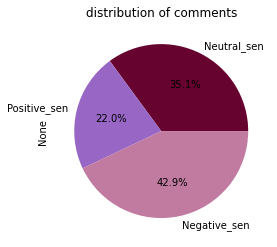

In [38]:
scount = senti.sum(axis=0)
scount.plot.pie(autopct='%1.1f%%',colors =['#67032F','#9867C5','#c27ba0ff'])
plt.title('distribution of comments')
plt.savefig('piesenit.png')

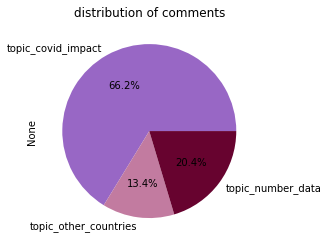

In [36]:
topic_count =  topic.sum(axis=0)
topic_count.plot.pie( autopct='%1.1f%%',colors =['#9867C5','#c27ba0ff','#67032F'])
plt.title('distribution of comments')
plt.savefig('pie_topic.png')
#'#67032F

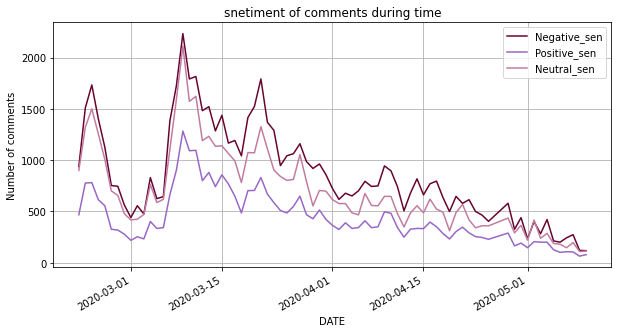

In [11]:
import matplotlib.pyplot as plt
senti.plot(x='DATE', y=['Negative_sen', 'Positive_sen','Neutral_sen'], figsize=(10,5), grid=True, 
           color =['#67032F','#9867C5','#c27ba0ff'])
plt.ylabel('Number of comments')
plt.title('snetiment of comments during time')
plt.savefig('senti.png')

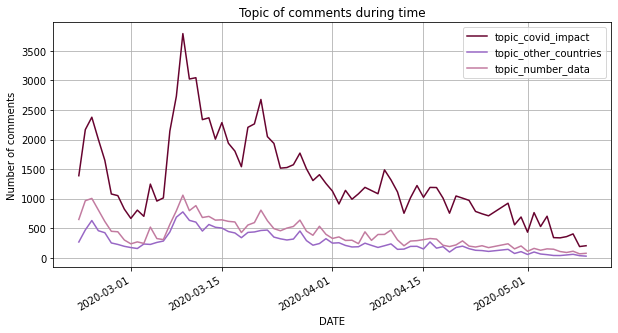

In [39]:
topic.plot(x='DATE', y=['topic_covid_impact', 'topic_other_countries','topic_number_data'], figsize=(10,5), grid=True, 
           color =['#67032F','#9867C5','#c27ba0ff'])
plt.ylabel('Number of comments')
plt.title('Topic of comments during time')
plt.savefig('topic.png')

In [47]:
import pandas as pd
prociv_data = pd.read_csv('/content/drive/My Drive/Topic detection/prociv_data.csv', sep = ';', index_col = [0])
prociv_data = prociv_data.rename(columns = {'data':'DATE'})
prociv_data = prociv_data.groupby('DATE').sum()
prociv_data = prociv_data.reset_index()
prociv_data = prociv_data.loc[:, ['DATE','totale_positivi']]
prociv_data['DATE'] =pd.to_datetime(prociv_data.DATE,dayfirst=True)
prociv_data = prociv_data.sort_values(by=['DATE']).reset_index().drop('index',axis=1)
prociv_data

,DATE,totale_positivi
0,2020-02-24,221
1,2020-02-25,311
2,2020-02-26,385
3,2020-02-27,588
4,2020-02-28,821
...,...,...
146,2020-07-19,12440
147,2020-07-20,12404
148,2020-07-21,12248
149,2020-07-22,12322


In [60]:
#drop the rows that are not in the previous analysis
prociv_data= prociv_data[:-74]

In [45]:
prociv_data.head()

,DATE,totale_positivi
0,2020-02-24,221
1,2020-02-25,311
2,2020-02-26,385
3,2020-02-27,588
4,2020-02-28,821


In [107]:
topic = topic.iloc[2:]


In [108]:
merge_t = reduce(lambda x,y: pd.merge(x,y, on='DATE', how='outer'), [topic, prociv_data])
merge_t['DATE'] =pd.to_datetime(merge_t.DATE,dayfirst=True)
merge_t = merge_t.sort_values(by=['DATE']).reset_index().drop('index',axis=1)
merge_t

,DATE,topic_covid_impact,topic_other_countries,topic_number_data,totale_positivi
0,2020-02-24,2378.0,631.0,1005.0,221
1,2020-02-25,2005.0,459.0,810.0,311
2,2020-02-26,1649.0,425.0,615.0,385
3,2020-02-27,1080.0,252.0,449.0,588
4,2020-02-28,1052.0,227.0,441.0,821
...,...,...,...,...,...
72,2020-05-06,338.0,39.0,107.0,91528
73,2020-05-07,359.0,49.0,91.0,89624
74,2020-05-08,405.0,60.0,112.0,87961
75,2020-05-09,191.0,37.0,68.0,84842


In [109]:
merge_t['total_comments']= merge_t[['topic_other_countries','topic_number_data','topic_covid_impact']].sum(axis=1)
merge.head(100)

,DATE,Neutral_sen,Positive_sen,Negative_sen,totale_positivi,total_comments
0,2020-02-24,1500.0,781.0,1733.0,221,4014.0
1,2020-02-25,1256.0,615.0,1403.0,311,3274.0
2,2020-02-26,1007.0,556.0,1126.0,385,2689.0
3,2020-02-27,701.0,327.0,753.0,588,1781.0
4,2020-02-28,656.0,319.0,745.0,821,1720.0
...,...,...,...,...,...,...
72,2020-05-06,181.0,102.0,201.0,91528,484.0
73,2020-05-07,147.0,108.0,244.0,89624,499.0
74,2020-05-08,197.0,106.0,274.0,87961,577.0
75,2020-05-09,110.0,65.0,121.0,84842,296.0


In [110]:
merge_t[['topic_other_countries','topic_number_data','topic_covid_impact']] = merge_t[['topic_other_countries','topic_number_data','topic_covid_impact']].div(merge['total_comments'].values,axis=0)

In [111]:
merge.head()

,DATE,Neutral_sen,Positive_sen,Negative_sen,totale_positivi,total_comments
0,2020-02-24,1500.0,781.0,1733.0,221,4014.0
1,2020-02-25,1256.0,615.0,1403.0,311,3274.0
2,2020-02-26,1007.0,556.0,1126.0,385,2689.0
3,2020-02-27,701.0,327.0,753.0,588,1781.0
4,2020-02-28,656.0,319.0,745.0,821,1720.0


In [56]:
merge.columns

Index(['DATE', 'Neutral_sen', 'Positive_sen', 'Negative_sen',
       'totale_positivi', 'total_comments'],
      dtype='object')

Text(0.5, 1.0, 'Topic of comments during time')

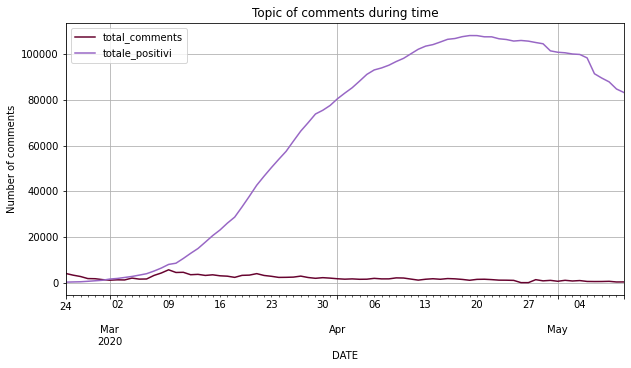

In [65]:
import matplotlib.pyplot as plt

merge.plot(x='DATE', y=['total_comments', 'totale_positivi'], figsize=(10,5), grid=True, 
           color =['#67032F','#9867C5'])
plt.ylabel('Number of comments')
plt.title('Topic of comments during time')
#plt.savefig('topic.png')
# ,'#c27ba0ff'

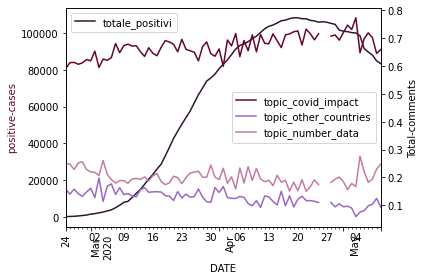

In [113]:
fig, ax1 = plt.subplots()
#ax1.plot(merge['DATE'], merge['totale_positivi'], color = '#67032F')
merge_t.plot(x="DATE", y=['totale_positivi'], ax=ax1,color ='#311432')
ax1.set_xticklabels(merge_t['DATE'][::4], rotation=90)
ax1.set_ylabel('positive-cases', color='#67032F')
ax2 = ax1.twinx()
#ax2.plot(merge['DATE'], merge['Negative_sen','Positive_sen'],color='#c27ba0ff')
merge_t.plot(x="DATE", y=['topic_covid_impact','topic_other_countries','topic_number_data'], ax=ax2,color=['#67032F','#9867C5','#c27ba0ff'])
ax2.set_ylabel('Total-comments')
#ax2.legend(['Reddit comments'])
#ax1.legend(['positive cases'])
fig.tight_layout()
plt.savefig('last_topic')

fig.tight_layout()

